In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

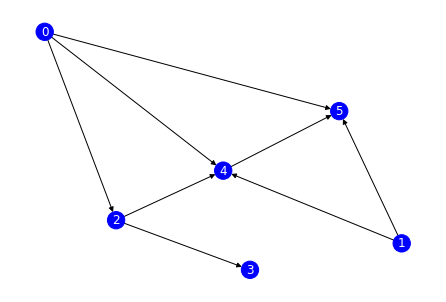

In [24]:
pos = {0: (8, 72), 1: (48, 8), 2: (16, 15), 3: (31, 0), 4: (28, 30), 5: (41, 48)}

G = nx.DiGraph()

G.add_edges_from([(0, 2), (0, 4), (0, 5), (1, 4),
                  (1, 5), (2, 3), (2, 4), (4, 5)])

Color_map = ['blue'  for i in range(6)]

nx.draw(G, pos, node_color = Color_map, with_labels = True, font_color = 'white', arrows = True)

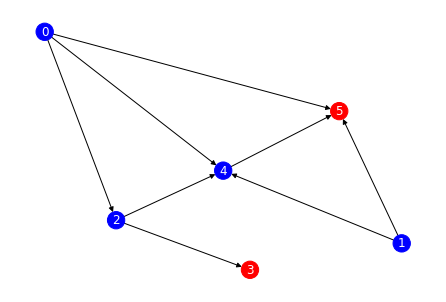

In [25]:
adj_rev = [[], [], [0], [2], [0, 1, 2], [0, 1, 4]]

deg  = [3, 2, 2, 0, 1, 0]
Win  = [False for i in range(6)]
Lose = [False for i in range(6)]

visited = [False for i in range(6)]

Lose[5] = Lose[3] = True
Color_map[5] = 'red'
Color_map[3] = 'red'

nx.draw(G, pos, node_color = Color_map, with_labels = True, font_color = 'white', arrows = True)
plt.show()

In [26]:
def DFS(u):
    global Color_map
    global visited, deg, Win, Lose
    global adj_rev
    global G
    
    visited[u] = True
    
    for v in adj_rev[u]:
        if (visited[v] == False):
            color_edges = ['black' if edge != (v, u) else 'red'
                           for edge in G.edges()]
            
            nx.draw(G, pos, node_color = Color_map, edge_color = color_edges, with_labels = True, font_color = 'white', arrows = True)
            plt.show()
            
            G[v][u]['color'] = 'black'
            
            if (Lose[u]):
                Win[v] = True
                Color_map[v] = 'green'
            else:
                deg[v] -= 1
                if (deg[v] == 0):
                    Lose[v] = True
                    Color_map[v] = 'red'
                else:
                    continue
            
            color_edges = ['black' for i in range(8)]
            nx.draw(G, pos, node_color = Color_map, edge_color = color_edges, with_labels = True, font_color = 'white', arrows = True)
            plt.show()
            
            DFS(v)

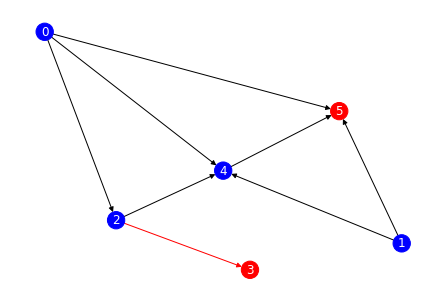

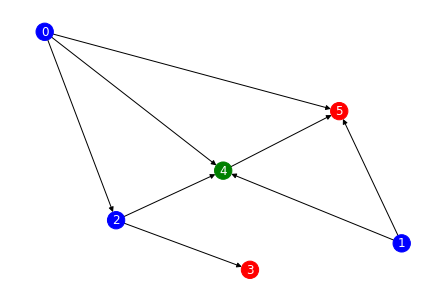

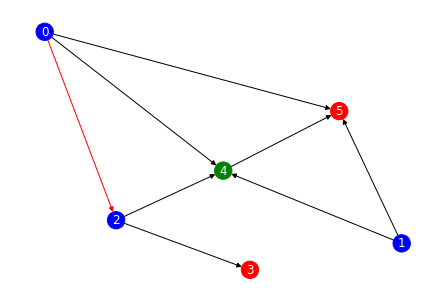

In [27]:
DFS(3)

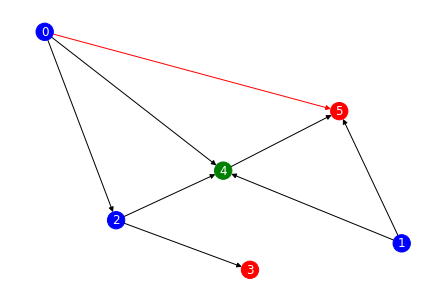

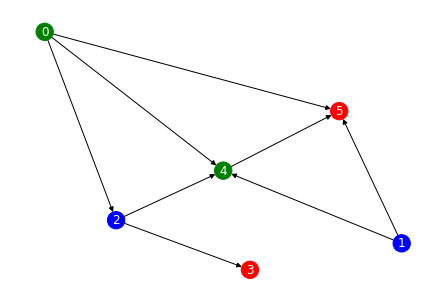

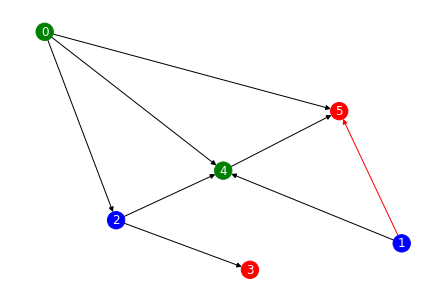

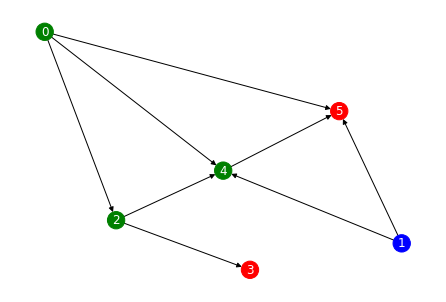

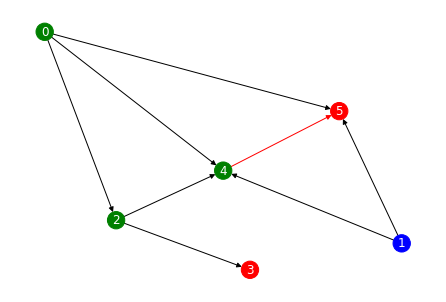

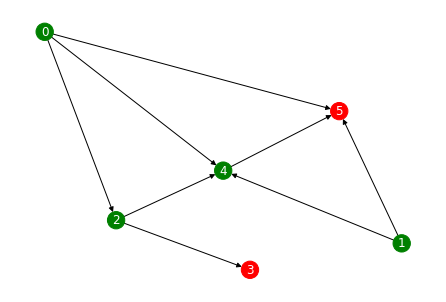

In [28]:
DFS(5)